### EEG analysis - Event-Related Potentials (ERPs)
This tutorial shows how to perform standard ERP analyses in A3E. 

In [24]:
import sys
sys.path.append('/Volumes/shares/FGB-ETP-DVM/dvm/DvM') # path to DvM package

from eeg_analyses.ERP import * 

# set project_folder
project_folder = '/Volumes/shares/FGB-ETP-DVM/dvm_projects/dist_decode' 
os.chdir(project_folder)

# read in preprocessed data
sj = 1
df, epochs = FolderStructure().load_processed_eeg(
                                        sj,'ses-1_main','main',None)

Reading /Volumes/shares/FGB-ETP-DVM/dvm_projects/dist_decode/processed/subject-1_ses-1_main-epo.fif ...
    Found the data of interest:
        t =    -849.61 ...    1050.78 ms
        0 CTF compensation matrices available
Adding metadata with 15 columns
2902 matching events found
No baseline correction applied
0 projection items activated


In [25]:
# create ERP object
erp_o = ERP(sj,epochs,df,'targets',baseline=(-0.1,0),l_filter=None,
            h_filter=30,downsample=None)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 227 samples (0.443 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 185728 out of 185728 | elapsed:   39.4s finished


In [26]:
# set whether target was at high or low distractor probqability location
df.loc[df.target_loc == 6,'target_prob'] = 'high'
df.loc[df.target_loc.isin([0,2,4]),'target_prob'] = 'low'

In [28]:
erp_o.lateralized_erp(pos_labels=dict(target_loc=[2, 6]),
                    cnds=dict(target_prob=['high', 'low']), 
                    midline=dict(dist_loc=[0, 4]), 
                    topo_flip=dict(target_loc=[2]), 
                    time_oi=(-0.1, 0.45), name='target_n2pc')

flipping topography
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


In [30]:
erp_c, times = FolderStructure().read_erps(erp_folder='targets', erp_name='target_n2pc',
                                          cnds=['high', 'low'], sjs='all')

Reading /Volumes/shares/FGB-ETP-DVM/dvm_projects/dist_decode/erp/targets/sj_1_high_target_n2pc-ave.fif ...
    Found the data of interest:
        t =     -99.61 ...     449.22 ms (0.03 × 1 + 0.01 × 4 + 0.01 × 10 + 0.03 × 13 + 0.01 × 15 + 0.01 × 16 + 0.03 × 18 + 0.01 × 20 + 0.01 × 27 + 0.01 × 29 + 0.01 × 30 + 0.01 × 31 + 0.01 × 36 + 0.01 × 39 + 0.01 × 40 + 0.03 × 46 + 0.01 × 50 + 0.03 × 57 + 0.01 × 61 + 0.01 × 66 + 0.01 × 67 + 0.01 × 68 + 0.01 × 69 + 0.01 × 70 + 0.01 × 72 + 0.01 × 73 + 0.03 × 75 + 0.01 × 78 + 0.01 × 83 + 0.01 × 90 + 0.01 × 99 + 0.03 × 102 + 0.01 × 105 + 0.01 × 107 + 0.01 × 119 + 0.01 × 125 + 0.01 × 126 + 0.01 × 136 + 0.03 × 137 + 0.01 × 138 + 0.01 × 141 + 0.01 × 142 + 0.03 × 143 + 0.01 × 145 + 0.01 × 149 + 0.01 × 150 + 0.03 × 156 + 0.01 × 163 + 0.01 × 165 + 0.01 × 172 + 0.01 × 176 + 0.03 × 193 + 0.01 × 198 + 0.03 × 201 + 0.01 × 202 + 0.01 × 207 + 0.01 × 208 + 0.01 × 212 + 0.01 × 216 + 0.03 × 223 + 0.01 × 225 + 0.01 × 228 + 0.01 × 231 + 0.01 × 235 + 0.01 × 237 + 0.01 × 

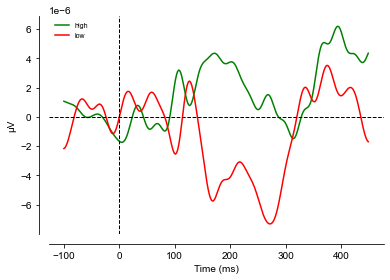

In [35]:
from visuals.plot_results import *
plot_erp_time_course(erp_c,times*1000,[['PO7'], ['PO8']],
                    contra_ipsi='d_wave',colors=['r','g'],
                    show_SE=False)

In [22]:
epochs.ch_names
flip_dict = {}
for elec in epochs.ch_names:
    if elec[-1].isdigit():  
        base_name = elec[:-1] 
        number = int(elec[-1])  
        if number % 2 == 1: 
            mirror_elec = f"{base_name}{number + 1}"  
            if mirror_elec in epochs.ch_names:  
                flip_dict[elec] = mirror_elec
flip_dict

{'Fp1': 'Fp2',
 'AF7': 'AF8',
 'AF3': 'AF4',
 'F1': 'F2',
 'F3': 'F4',
 'F5': 'F6',
 'F7': 'F8',
 'FT7': 'FT8',
 'FC5': 'FC6',
 'FC3': 'FC4',
 'FC1': 'FC2',
 'C1': 'C2',
 'C3': 'C4',
 'C5': 'C6',
 'T7': 'T8',
 'TP7': 'TP8',
 'CP5': 'CP6',
 'CP3': 'CP4',
 'CP1': 'CP2',
 'P1': 'P2',
 'P3': 'P4',
 'P5': 'P6',
 'P7': 'P8',
 'P9': 'P10',
 'PO7': 'PO8',
 'PO3': 'PO4',
 'O1': 'O2'}

# 